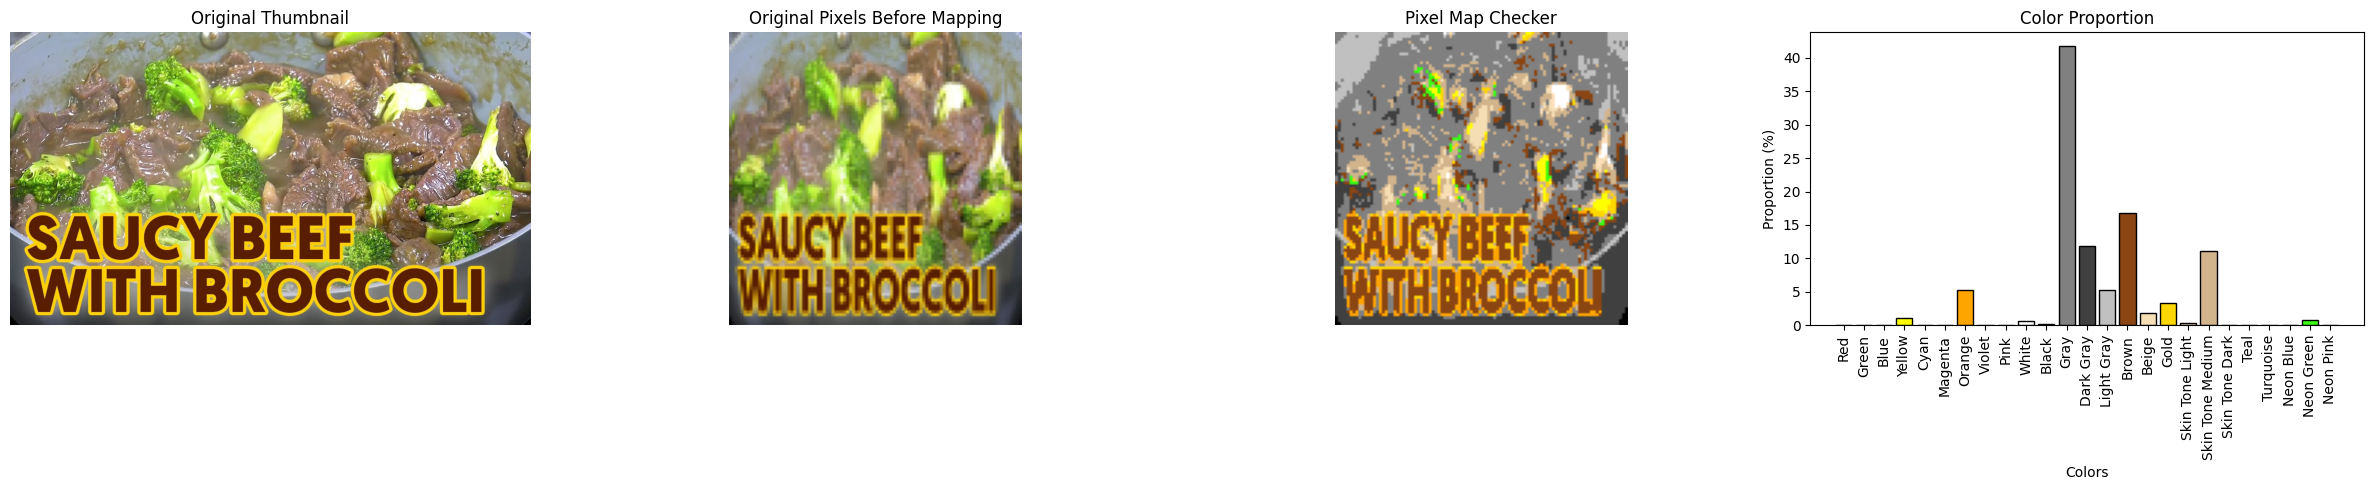

Processing complete.


In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Predefined color profile (normalized for calculation)
color_profile = {
    'Red': np.array([255, 0, 0]),
    'Green': np.array([0, 255, 0]),
    'Blue': np.array([0, 0, 255]),
    'Yellow': np.array([255, 255, 0]),
    'Cyan': np.array([0, 255, 255]),
    'Magenta': np.array([255, 0, 255]),
    'Orange': np.array([255, 165, 0]),
    'Violet': np.array([138, 43, 226]),
    'Pink': np.array([255, 192, 203]),
    
    # Neutral & Gray shades
    'White': np.array([255, 255, 255]),
    'Black': np.array([0, 0, 0]),
    'Gray': np.array([128, 128, 128]),
    'Dark Gray': np.array([64, 64, 64]),
    'Light Gray': np.array([192, 192, 192]),
    'Brown': np.array([139, 69, 19]),
    'Beige': np.array([245, 222, 179]),
    
    # Special highlight colors
    'Gold': np.array([255, 215, 0]),
    'Skin Tone Light': np.array([255, 224, 189]),
    'Skin Tone Medium': np.array([210, 180, 140]),
    'Skin Tone Dark': np.array([139, 69, 19]),
    'Teal': np.array([0, 128, 128]),
    'Turquoise': np.array([64, 224, 208]),
    
    # Neon highlights (for glowing effects in thumbnails)
    'Neon Blue': np.array([0, 191, 255]),
    'Neon Green': np.array([57, 255, 20]),
    'Neon Pink': np.array([255, 20, 147])
}

color_names = list(color_profile.keys())
color_array = np.array(list(color_profile.values()))

def calculate_color_proportions(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_AREA)  # Resize for consistency
    pixels = image_resized.reshape(-1, 3)

    distances = np.linalg.norm(pixels[:, None] - color_array[None, :], axis=2)
    closest_colors = np.argmin(distances, axis=1)

    unique, counts = np.unique(closest_colors, return_counts=True)
    color_counts = dict(zip(unique, counts))
    total_pixels = len(pixels)

    color_proportions = {
        color_names[i]: (color_counts.get(i, 0) / total_pixels) * 100 for i in range(len(color_names))
    }

    pixel_map = np.array([color_array[i] for i in closest_colors]).reshape(100, 100, 3)
    
    return color_proportions, pixel_map, image_resized  # Also return resized original pixels

def display_results(image_path, color_proportions, pixel_map, original_pixels):
    colors = list(color_proportions.keys())
    proportions = list(color_proportions.values())

    fig, axs = plt.subplots(1, 4, figsize=(24, 5))

    # Original Thumbnail
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[0].imshow(img)
    axs[0].axis('off')
    axs[0].set_title('Original Thumbnail')

    # Original Pixels Before Color Mapping
    axs[1].imshow(original_pixels.astype(np.uint8))
    axs[1].axis('off')
    axs[1].set_title('Original Pixels Before Mapping')

    # Pixel Map Checker (Mapped Colors)
    axs[2].imshow(pixel_map.astype(np.uint8))
    axs[2].axis('off')
    axs[2].set_title('Pixel Map Checker')

    # Color Proportion Bar Chart
    axs[3].bar(colors, proportions, color=np.array(list(color_profile.values())) / 255, edgecolor='black')
    axs[3].set_title('Color Proportion')
    axs[3].set_xlabel('Colors')
    axs[3].set_ylabel('Proportion (%)')
    axs[3].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

# Input
thumbnail_id = "-Cj7f90E3RU"  # Manually set the thumbnail ID
image_folder = r'C:\Users\yesha\Desktop\College\4th year\1st Semester\THS-ST1\thumbnail_extract\thumbnails'
image_path = os.path.join(image_folder, f"{thumbnail_id}.jpg")

# Process Image
color_proportions, pixel_map, original_pixels = calculate_color_proportions(image_path)

# Display Results
display_results(image_path, color_proportions, pixel_map, original_pixels)

print("Processing complete.")


-Cj7f90E3RU
2lyBEDWL3Qs
0D9tN9qchK4
CETKSKaCIrQ

Try a Different Approach using HSV 

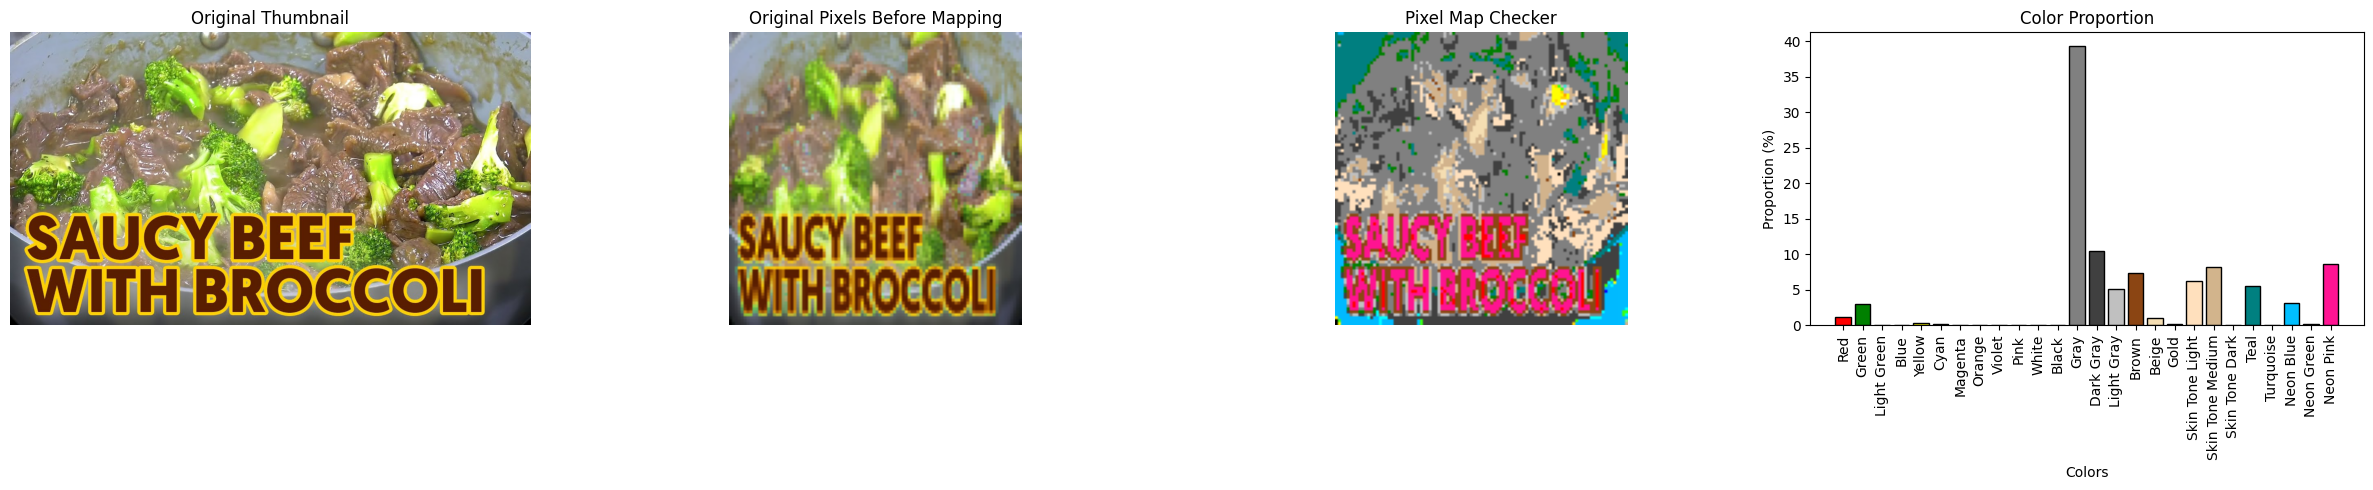

Processing complete.


In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Predefined color profile (normalized for calculation)
color_profile = {
    'Red': np.array([255, 0, 0]),
    'Green': np.array([0, 128, 0]),  # Darker shade of green
    'Light Green': np.array([144, 238, 144]),  # Lighter shade of green
    'Blue': np.array([0, 0, 255]),
    'Yellow': np.array([255, 255, 0]),
    'Cyan': np.array([0, 255, 255]),
    'Magenta': np.array([255, 0, 255]),
    'Orange': np.array([255, 165, 0]),
    'Violet': np.array([138, 43, 226]),
    'Pink': np.array([255, 192, 203]),
    
    # Neutral & Gray shades
    'White': np.array([255, 255, 255]),
    'Black': np.array([0, 0, 0]),
    'Gray': np.array([128, 128, 128]),
    'Dark Gray': np.array([64, 64, 64]),
    'Light Gray': np.array([192, 192, 192]),
    'Brown': np.array([139, 69, 19]),
    'Beige': np.array([245, 222, 179]),
    
    # Special highlight colors
    'Gold': np.array([255, 215, 0]),
    'Skin Tone Light': np.array([255, 224, 189]),
    'Skin Tone Medium': np.array([210, 180, 140]),
    'Skin Tone Dark': np.array([139, 69, 19]),
    'Teal': np.array([0, 128, 128]),
    'Turquoise': np.array([64, 224, 208]),
    
    # Neon highlights (for glowing effects in thumbnails)
    'Neon Blue': np.array([0, 191, 255]),
    'Neon Green': np.array([57, 255, 20]),
    'Neon Pink': np.array([255, 20, 147])
}
color_names = list(color_profile.keys())
color_array = np.array(list(color_profile.values()))

def calculate_color_proportions(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)  # Convert to HSV
    image_resized = cv2.resize(image_hsv, (100, 100), interpolation=cv2.INTER_AREA)
    pixels = image_resized.reshape(-1, 3)
    
    # Convert color profile to HSV
    color_profile_hsv = {name: cv2.cvtColor(np.uint8([[color]]), cv2.COLOR_RGB2HSV)[0][0] for name, color in color_profile.items()}
    color_array_hsv = np.array(list(color_profile_hsv.values()))
    
    distances = np.linalg.norm(pixels[:, None] - color_array_hsv[None, :], axis=2)
    closest_colors = np.argmin(distances, axis=1)
    unique, counts = np.unique(closest_colors, return_counts=True)
    color_counts = dict(zip(unique, counts))
    total_pixels = len(pixels)
    color_proportions = {
        color_names[i]: (color_counts.get(i, 0) / total_pixels) * 100 for i in range(len(color_names))
    }
    pixel_map = np.array([cv2.cvtColor(np.uint8([[color_array[i]]]), cv2.COLOR_RGB2HSV)[0][0] for i in closest_colors]).reshape(100, 100, 3)
    
    return color_proportions, pixel_map, image_resized

def display_results(image_path, color_proportions, pixel_map, original_pixels):
    colors = list(color_proportions.keys())
    proportions = list(color_proportions.values())
    fig, axs = plt.subplots(1, 4, figsize=(24, 5))
    # Original Thumbnail
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[0].imshow(img)
    axs[0].axis('off')
    axs[0].set_title('Original Thumbnail')
    # Original Pixels Before Color Mapping
    axs[1].imshow(cv2.cvtColor(original_pixels.astype(np.uint8), cv2.COLOR_HSV2RGB))
    axs[1].axis('off')
    axs[1].set_title('Original Pixels Before Mapping')
    # Pixel Map Checker (Mapped Colors)
    axs[2].imshow(cv2.cvtColor(pixel_map.astype(np.uint8), cv2.COLOR_HSV2RGB))
    axs[2].axis('off')
    axs[2].set_title('Pixel Map Checker')
    # Color Proportion Bar Chart
    axs[3].bar(colors, proportions, color=np.array(list(color_profile.values())) / 255, edgecolor='black')
    axs[3].set_title('Color Proportion')
    axs[3].set_xlabel('Colors')
    axs[3].set_ylabel('Proportion (%)')
    axs[3].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

# Input
thumbnail_id = "-Cj7f90E3RU"  # Manually set the thumbnail ID
image_folder = r'C:\Users\yesha\Desktop\College\4th year\1st Semester\THS-ST1\thumbnail_extract\thumbnails'
image_path = os.path.join(image_folder, f"{thumbnail_id}.jpg")

# Process Image
color_proportions, pixel_map, original_pixels = calculate_color_proportions(image_path)

# Display Results
display_results(image_path, color_proportions, pixel_map, original_pixels)
print("Processing complete.")